
# Project: FBI Gun Investigation and Data Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The source of the data is FBI's National Instant Criminal Background Check System (NICS). This system is used to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. 
> The data has been supplemented with state level data from census.gov.

#### About the data:

> The NICS data is found in a single sheet of an .xlsx file. It contains the number of firearm checks by month, state, and type.
> The U.S. census data is found in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one
year.

> Questions asked: 
> 1. Which state has the highest total gun purchases in April 2000 and April 2010?
> 2. What is per capita firearm sales for all states in April 2010 vs July 2016?

In [420]:
# Use this cell to set up import statements for all of the packages that you plan to use.
import pandas as pd 
import numpy as np 
import datetime

# Remember to include a 'magic word' so that your visualizations are plotted 
# inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [421]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_census = pd.read_csv('U.S. Census Data.csv')
df_gun = pd.read_excel('gun_data.xlsx')

In [422]:
# Printing out a few lines of both the datasets
display(df_census.head())
display(df_gun.head())

,State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,4863300,4780131,0.017,4779736,0.060,0.064,0.226,0.237,0.161,...,374153,203604,137630,92219,272651,41943,316984,94.4,50645.33,"""01"""
1,Alaska,741894,710249,0.045,710231,0.073,0.076,0.252,0.264,0.104,...,68032,35402,22141,13688,51147,7953,56091,1.2,570640.95,"""02"""
2,Arizona,6931071,6392301,0.084,6392017,0.063,0.071,0.235,0.255,0.169,...,499926,245243,182425,135313,344981,46780,427582,56.3,113594.08,"""04"""
3,Arkansas,2988248,2916025,0.025,2915918,0.064,0.068,0.236,0.244,0.163,...,231959,123158,75962,35982,189029,25915,192988,56.0,52035.48,"""05"""
4,California,39250017,37254522,0.054,37253956,0.063,0.068,0.232,0.250,0.136,...,3548449,1852580,1320085,1619857,1819107,252377,3176341,239.1,155779.22,"""06"""


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [423]:
df_census.set_index('State',inplace = True)
df_census

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
State,,,,,,,,,,,,,,,,,,,,,
Alabama,4863300,4780131,0.017,4779736,0.060,0.064,0.226,0.237,0.161,0.138,...,374153,203604,137630,92219,272651,41943,316984,94.4,50645.33,"""01"""
Alaska,741894,710249,0.045,710231,0.073,0.076,0.252,0.264,0.104,0.077,...,68032,35402,22141,13688,51147,7953,56091,1.2,570640.95,"""02"""
Arizona,6931071,6392301,0.084,6392017,0.063,0.071,0.235,0.255,0.169,0.138,...,499926,245243,182425,135313,344981,46780,427582,56.3,113594.08,"""04"""
Arkansas,2988248,2916025,0.025,2915918,0.064,0.068,0.236,0.244,0.163,0.144,...,231959,123158,75962,35982,189029,25915,192988,56.0,52035.48,"""05"""
California,39250017,37254522,0.054,37253956,0.063,0.068,0.232,0.250,0.136,0.114,...,3548449,1852580,1320085,1619857,1819107,252377,3176341,239.1,155779.22,"""06"""
Colorado,5540545,5029324,0.102,5029196,0.061,0.068,0.228,0.244,0.134,0.109,...,547352,284554,194508,85849,442365,51722,469524,48.5,103641.89,"""08"""
Connecticut,3576452,3574114,0.001,3574097,0.052,0.057,0.211,0.229,0.161,0.142,...,326693,187845,106678,56113,259614,31056,281182,738.1,4842.36,"""09"""
Delaware,952065,897936,0.060,897934,0.058,0.062,0.215,0.229,0.175,0.144,...,73418,38328,23964,14440,54782,7206,60318,460.8,1948.54,"""10"""
Florida,20612439,18804592,0.096,18801310,0.055,0.057,0.201,0.213,0.199,0.173,...,2100187,1084885,807817,926112,1121749,185756,1846686,350.6,53624.76,"""12"""


In [424]:
#Inspecting the data and getting information on the dimensions of the  dataframes
display("Census dimensions: " +str(df_census.shape))
display("Gun Dimensions:" + str(df_gun.shape))

'Census dimensions: (50, 65)'

'Gun Dimensions:(12485, 27)'

In [425]:
#Printing concise summary of both the dataframes helping in knowing the datatypes and null vales
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 65 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     int64  
 1   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     int64  
 2   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     float64
 3   Population, Census, April 1, 2010                                                       50 non-null     int64  
 4   Persons under 5 years, percent, July 1, 2016,  (V2016)                                  50 non-null     float64
 5   Persons under 5 years, percent, April 1, 2010                      

In [426]:
#Printing concise summary of both the dataframes helping in knowing the datatypes and null vales
df_gun.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [427]:
#Giving a general descriptive statistics of the dataframe
df_census.describe()

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
count,5.000000e+01,5.000000e+01,50.000000,5.000000e+01,50.000000,50.000000,50.00000,50.000000,50.000000,50.00000,...,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.00000,5.000000e+01,50.000000,50.000000
mean,6.448927e+06,6.163127e+06,0.041800,6.162876e+06,0.061600,0.065460,0.22750,0.238820,0.156160,0.13292,...,4.855009e+05,5.548918e+05,2.976230e+05,1.971777e+05,1.585531e+05,3.806367e+05,50502.72000,4.817082e+05,194.962000,70636.887800
std,7.271769e+06,6.848463e+06,0.033811,6.848235e+06,0.006612,0.007579,0.01977,0.019075,0.018321,0.01664,...,6.076460e+05,6.645229e+05,3.540115e+05,2.482425e+05,3.017390e+05,3.618627e+05,52073.87529,5.921109e+05,261.091465,85815.678218
min,5.855010e+05,5.637670e+05,-0.012000,5.636260e+05,0.048000,0.051000,0.19000,0.207000,0.104000,0.07700,...,4.814000e+04,6.242700e+04,3.003900e+04,1.934400e+04,2.354000e+03,3.851000e+04,6470.00000,5.135300e+04,1.200000,1033.810000
25%,1.850106e+06,1.833003e+06,0.016250,1.833004e+06,0.058000,0.062000,0.21650,0.226750,0.149250,0.12425,...,1.215145e+05,1.478222e+05,7.734775e+04,4.682475e+04,1.471450e+04,1.310602e+05,15796.50000,1.254088e+05,44.450000,36741.167500
50%,4.559320e+06,4.436412e+06,0.040500,4.436370e+06,0.061000,0.065000,0.22750,0.237000,0.156500,0.13500,...,3.014300e+05,3.535155e+05,1.951455e+05,1.274355e+05,6.306350e+04,2.769725e+05,38051.50000,2.959635e+05,98.750000,53891.280000
75%,7.198768e+06,6.680362e+06,0.063750,6.680312e+06,0.064000,0.069750,0.23675,0.248000,0.165000,0.14275,...,5.096492e+05,5.933612e+05,3.403212e+05,2.066418e+05,1.301590e+05,4.481730e+05,58253.25000,5.116312e+05,209.500000,81225.725000
max,3.925002e+07,3.725452e+07,0.127000,3.725396e+07,0.083000,0.095000,0.30200,0.315000,0.199000,0.17300,...,3.206958e+06,3.548449e+06,1.852580e+06,1.320085e+06,1.619857e+06,1.819107e+06,252377.00000,3.176341e+06,1195.500000,570640.950000


In [428]:
#Giving a general descriptive statistics of the dataframe
df_gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [429]:
#Looking into the column names in the dataframe
for col in df_census.columns:
    print(col)

Population estimates, July 1, 2016,  (V2016)
Population estimates base, April 1, 2010,  (V2016)
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)
Population, Census, April 1, 2010
Persons under 5 years, percent, July 1, 2016,  (V2016)
Persons under 5 years, percent, April 1, 2010
Persons under 18 years, percent, July 1, 2016,  (V2016)
Persons under 18 years, percent, April 1, 2010
Persons 65 years and over, percent,  July 1, 2016,  (V2016)
Persons 65 years and over, percent, April 1, 2010
Female persons, percent,  July 1, 2016,  (V2016)
Female persons, percent, April 1, 2010
White alone, percent, July 1, 2016,  (V2016)
Black or African American alone, percent, July 1, 2016,  (V2016)
American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)
Asian alone, percent, July 1, 2016,  (V2016)
Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)
Two or More Races, percent, July 1, 2016,  (V2016)
Hispanic or Latino, p

In [430]:
#looking into the column names for the gun dataframe
for col in df_gun.columns:
    print(col)

month
state
permit
permit_recheck
handgun
long_gun
other
multiple
admin
prepawn_handgun
prepawn_long_gun
prepawn_other
redemption_handgun
redemption_long_gun
redemption_other
returned_handgun
returned_long_gun
returned_other
rentals_handgun
rentals_long_gun
private_sale_handgun
private_sale_long_gun
private_sale_other
return_to_seller_handgun
return_to_seller_long_gun
return_to_seller_other
totals


After manually analyzing both the datasets carefully in Excel, data for a few of the states is not very consistent in the datasets we are considering.Some of the states aren't present in the Gun data as compared to the Census data.The states include: Guam, District of Columbia, Puerto Rico, Mariana Islands, Virgin Islands. We can eliminate the data so as to avoid any confusions in the analysis.

In [431]:
#Removing all the unnecessary state data from the guns data set
print(df_gun.state.nunique())

df_gun = df_gun[df_gun.state != 'Guam']
df_gun = df_gun[df_gun.state != 'District of Columbia']
df_gun = df_gun[df_gun.state != 'Puerto Rico']
df_gun = df_gun[df_gun.state != 'Mariana Islands']
df_gun = df_gun[df_gun.state != 'Virgin Islands']

55


In [432]:
df_census.dtypes

Population estimates, July 1, 2016,  (V2016)                                               int64
Population estimates base, April 1, 2010,  (V2016)                                         int64
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)    float64
Population, Census, April 1, 2010                                                          int64
Persons under 5 years, percent, July 1, 2016,  (V2016)                                   float64
                                                                                          ...   
Veteran-owned firms, 2012                                                                  int64
Nonveteran-owned firms, 2012                                                               int64
Population per square mile, 2010                                                         float64
Land area in square miles, 2010                                                          float64
FIPS Code                     

In [433]:
df_gun.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [434]:
#Check for duplicates in the Guns data
sum(df_gun.duplicated())

0

In [435]:
#Check for duplicates in the Census data
sum(df_census.duplicated())

0

In [436]:
#Checking for NaN values
df_census.isnull().any().any(), sum(df_census.isnull().any())

(False, 0)

In [437]:
df_census.isnull().any()

Population estimates, July 1, 2016,  (V2016)                                             False
Population estimates base, April 1, 2010,  (V2016)                                       False
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)    False
Population, Census, April 1, 2010                                                        False
Persons under 5 years, percent, July 1, 2016,  (V2016)                                   False
                                                                                         ...  
Veteran-owned firms, 2012                                                                False
Nonveteran-owned firms, 2012                                                             False
Population per square mile, 2010                                                         False
Land area in square miles, 2010                                                          False
FIPS Code                                         

In [438]:
df_gun.isnull().any().any(), sum(df_gun.isnull().any())

(True, 21)

In [439]:
df_gun.isnull().any()

month                        False
state                        False
permit                        True
permit_recheck                True
handgun                      False
long_gun                     False
other                         True
multiple                     False
admin                         True
prepawn_handgun               True
prepawn_long_gun              True
prepawn_other                 True
redemption_handgun            True
redemption_long_gun           True
redemption_other              True
returned_handgun              True
returned_long_gun             True
returned_other                True
rentals_handgun               True
rentals_long_gun              True
private_sale_handgun          True
private_sale_long_gun         True
private_sale_other            True
return_to_seller_handgun      True
return_to_seller_long_gun     True
return_to_seller_other        True
totals                       False
dtype: bool

In [440]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 65 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     int64  
 1   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     int64  
 2   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     float64
 3   Population, Census, April 1, 2010                                                       50 non-null     int64  
 4   Persons under 5 years, percent, July 1, 2016,  (V2016)                                  50 non-null     float64
 5   Persons under 5 years, percent, April 1, 2010                      

In [441]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      11350 non-null  object 
 1   state                      11350 non-null  object 
 2   permit                     11348 non-null  float64
 3   permit_recheck             1000 non-null   float64
 4   handgun                    11350 non-null  float64
 5   long_gun                   11350 non-null  float64
 6   other                      5000 non-null   float64
 7   multiple                   11350 non-null  int64  
 8   admin                      11348 non-null  float64
 9   prepawn_handgun            9597 non-null   float64
 10  prepawn_long_gun           9595 non-null   float64
 11  prepawn_other              4650 non-null   float64
 12  redemption_handgun         9600 non-null   float64
 13  redemption_long_gun        9598 non-null   flo

### Data Cleaning

In [442]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# We are starting the cleaning process by checking the duplicates and getting rid of them, if any
df_census.drop_duplicates(inplace = True)
sum(df_census.duplicated())

0

In [443]:
df_gun.drop_duplicates(inplace = True)
sum(df_gun.duplicated())

0

In [444]:
#Now we will fill all the empty / NA values using the fillna function
df_census.fillna('No Records', inplace = True)
df_census.isnull().any()

Population estimates, July 1, 2016,  (V2016)                                             False
Population estimates base, April 1, 2010,  (V2016)                                       False
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)    False
Population, Census, April 1, 2010                                                        False
Persons under 5 years, percent, July 1, 2016,  (V2016)                                   False
                                                                                         ...  
Veteran-owned firms, 2012                                                                False
Nonveteran-owned firms, 2012                                                             False
Population per square mile, 2010                                                         False
Land area in square miles, 2010                                                          False
FIPS Code                                         

In [445]:
df_gun.fillna(df_gun.mean(), inplace = True )
df_gun.isnull().any()

month                        False
state                        False
permit                       False
permit_recheck               False
handgun                      False
long_gun                     False
other                        False
multiple                     False
admin                        False
prepawn_handgun              False
prepawn_long_gun             False
prepawn_other                False
redemption_handgun           False
redemption_long_gun          False
redemption_other             False
returned_handgun             False
returned_long_gun            False
returned_other               False
rentals_handgun              False
rentals_long_gun             False
private_sale_handgun         False
private_sale_long_gun        False
private_sale_other           False
return_to_seller_handgun     False
return_to_seller_long_gun    False
return_to_seller_other       False
totals                       False
dtype: bool

In [446]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      11350 non-null  object 
 1   state                      11350 non-null  object 
 2   permit                     11350 non-null  float64
 3   permit_recheck             11350 non-null  float64
 4   handgun                    11350 non-null  float64
 5   long_gun                   11350 non-null  float64
 6   other                      11350 non-null  float64
 7   multiple                   11350 non-null  int64  
 8   admin                      11350 non-null  float64
 9   prepawn_handgun            11350 non-null  float64
 10  prepawn_long_gun           11350 non-null  float64
 11  prepawn_other              11350 non-null  float64
 12  redemption_handgun         11350 non-null  float64
 13  redemption_long_gun        11350 non-null  flo

In [447]:
#Noticing the names of the column names, we can bring the column names to a single format

df_census.rename(columns = lambda x:x.lower(), inplace = True)
df_census

,"population estimates, july 1, 2016, (v2016)","population estimates base, april 1, 2010, (v2016)","population, percent change - april 1, 2010 (estimates base) to july 1, 2016, (v2016)","population, census, april 1, 2010","persons under 5 years, percent, july 1, 2016, (v2016)","persons under 5 years, percent, april 1, 2010","persons under 18 years, percent, july 1, 2016, (v2016)","persons under 18 years, percent, april 1, 2010","persons 65 years and over, percent, july 1, 2016, (v2016)","persons 65 years and over, percent, april 1, 2010",...,"all firms, 2012","men-owned firms, 2012","women-owned firms, 2012","minority-owned firms, 2012","nonminority-owned firms, 2012","veteran-owned firms, 2012","nonveteran-owned firms, 2012","population per square mile, 2010","land area in square miles, 2010",fips code
State,,,,,,,,,,,,,,,,,,,,,
Alabama,4863300,4780131,0.017,4779736,0.060,0.064,0.226,0.237,0.161,0.138,...,374153,203604,137630,92219,272651,41943,316984,94.4,50645.33,"""01"""
Alaska,741894,710249,0.045,710231,0.073,0.076,0.252,0.264,0.104,0.077,...,68032,35402,22141,13688,51147,7953,56091,1.2,570640.95,"""02"""
Arizona,6931071,6392301,0.084,6392017,0.063,0.071,0.235,0.255,0.169,0.138,...,499926,245243,182425,135313,344981,46780,427582,56.3,113594.08,"""04"""
Arkansas,2988248,2916025,0.025,2915918,0.064,0.068,0.236,0.244,0.163,0.144,...,231959,123158,75962,35982,189029,25915,192988,56.0,52035.48,"""05"""
California,39250017,37254522,0.054,37253956,0.063,0.068,0.232,0.250,0.136,0.114,...,3548449,1852580,1320085,1619857,1819107,252377,3176341,239.1,155779.22,"""06"""
Colorado,5540545,5029324,0.102,5029196,0.061,0.068,0.228,0.244,0.134,0.109,...,547352,284554,194508,85849,442365,51722,469524,48.5,103641.89,"""08"""
Connecticut,3576452,3574114,0.001,3574097,0.052,0.057,0.211,0.229,0.161,0.142,...,326693,187845,106678,56113,259614,31056,281182,738.1,4842.36,"""09"""
Delaware,952065,897936,0.060,897934,0.058,0.062,0.215,0.229,0.175,0.144,...,73418,38328,23964,14440,54782,7206,60318,460.8,1948.54,"""10"""
Florida,20612439,18804592,0.096,18801310,0.055,0.057,0.201,0.213,0.199,0.173,...,2100187,1084885,807817,926112,1121749,185756,1846686,350.6,53624.76,"""12"""


In [448]:
df_gun

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.000,5734.0,6320.0,221.0000,317,0.0,15.000000,...,0.000000,0.000000,0.000,9.0000,16.0000,3.0000,0.000000,0.0000,3.00000,32019
1,2017-09,Alaska,209.0,2.000,2320.0,2930.0,219.0000,160,0.0,5.000000,...,0.000000,0.000000,0.000,17.0000,24.0000,1.0000,0.000000,0.0000,0.00000,6303
2,2017-09,Arizona,5069.0,382.000,11063.0,7946.0,920.0000,631,0.0,13.000000,...,0.000000,0.000000,0.000,38.0000,12.0000,2.0000,0.000000,0.0000,0.00000,28394
3,2017-09,Arkansas,2935.0,632.000,4347.0,6063.0,165.0000,366,51.0,12.000000,...,0.000000,0.000000,0.000,13.0000,23.0000,0.0000,0.000000,2.0000,1.00000,17747
4,2017-09,California,57839.0,0.000,37165.0,24581.0,2984.0000,0,0.0,0.000000,...,0.000000,0.000000,0.000,0.0000,0.0000,0.0000,0.000000,0.0000,0.00000,123506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,1998-11,Virginia,0.0,1282.552,14.0,2.0,396.0524,8,0.0,5.301969,...,1.130303,0.084444,0.096,16.4272,12.7632,1.1316,0.439556,0.4844,0.11561,24
12481,1998-11,Washington,1.0,1282.552,65.0,286.0,396.0524,8,1.0,5.301969,...,1.130303,0.084444,0.096,16.4272,12.7632,1.1316,0.439556,0.4844,0.11561,361
12482,1998-11,West Virginia,3.0,1282.552,149.0,251.0,396.0524,5,0.0,5.301969,...,1.130303,0.084444,0.096,16.4272,12.7632,1.1316,0.439556,0.4844,0.11561,408
12483,1998-11,Wisconsin,0.0,1282.552,25.0,214.0,396.0524,2,0.0,5.301969,...,1.130303,0.084444,0.096,16.4272,12.7632,1.1316,0.439556,0.4844,0.11561,241


In [449]:
#For dealing with dates, we will bring them to the standard format using the datetime package
df_gun.month = pd.to_datetime(df_gun['month'], errors='coerce')


df_gun

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717.0,0.000,5734.0,6320.0,221.0000,317,0.0,15.000000,...,0.000000,0.000000,0.000,9.0000,16.0000,3.0000,0.000000,0.0000,3.00000,32019
1,2017-09-01,Alaska,209.0,2.000,2320.0,2930.0,219.0000,160,0.0,5.000000,...,0.000000,0.000000,0.000,17.0000,24.0000,1.0000,0.000000,0.0000,0.00000,6303
2,2017-09-01,Arizona,5069.0,382.000,11063.0,7946.0,920.0000,631,0.0,13.000000,...,0.000000,0.000000,0.000,38.0000,12.0000,2.0000,0.000000,0.0000,0.00000,28394
3,2017-09-01,Arkansas,2935.0,632.000,4347.0,6063.0,165.0000,366,51.0,12.000000,...,0.000000,0.000000,0.000,13.0000,23.0000,0.0000,0.000000,2.0000,1.00000,17747
4,2017-09-01,California,57839.0,0.000,37165.0,24581.0,2984.0000,0,0.0,0.000000,...,0.000000,0.000000,0.000,0.0000,0.0000,0.0000,0.000000,0.0000,0.00000,123506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,1998-11-01,Virginia,0.0,1282.552,14.0,2.0,396.0524,8,0.0,5.301969,...,1.130303,0.084444,0.096,16.4272,12.7632,1.1316,0.439556,0.4844,0.11561,24
12481,1998-11-01,Washington,1.0,1282.552,65.0,286.0,396.0524,8,1.0,5.301969,...,1.130303,0.084444,0.096,16.4272,12.7632,1.1316,0.439556,0.4844,0.11561,361
12482,1998-11-01,West Virginia,3.0,1282.552,149.0,251.0,396.0524,5,0.0,5.301969,...,1.130303,0.084444,0.096,16.4272,12.7632,1.1316,0.439556,0.4844,0.11561,408
12483,1998-11-01,Wisconsin,0.0,1282.552,25.0,214.0,396.0524,2,0.0,5.301969,...,1.130303,0.084444,0.096,16.4272,12.7632,1.1316,0.439556,0.4844,0.11561,241


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which state has the highest total gun purchases in April 2005 and April 2010?

In [450]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

#We will create a new df with all the columns that will be required to perform the analysis

df_gun_q1 = df_gun[['month','state','totals']]

df_gun_q1

,month,state,totals
0,2017-09-01,Alabama,32019
1,2017-09-01,Alaska,6303
2,2017-09-01,Arizona,28394
3,2017-09-01,Arkansas,17747
4,2017-09-01,California,123506
...,...,...,...
12480,1998-11-01,Virginia,24
12481,1998-11-01,Washington,361
12482,1998-11-01,West Virginia,408
12483,1998-11-01,Wisconsin,241


In [451]:
df_gun_q1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   11350 non-null  datetime64[ns]
 1   state   11350 non-null  object        
 2   totals  11350 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 354.7+ KB


In [452]:
#Now lets extract just the April 2000 and April 2010 data 
q1_2005 = df_gun_q1[df_gun_q1['month'] == "2005-04-01"]
display(q1_2005.head())

q1_2010 = df_gun_q1[df_gun_q1['month'] == "2010-04-01"]
display(q1_2010.head())

,month,state,totals
8195,2005-04-01,Alabama,14099
8196,2005-04-01,Alaska,3843
8197,2005-04-01,Arizona,13659
8198,2005-04-01,Arkansas,10027
8199,2005-04-01,California,49679


,month,state,totals
4895,2010-04-01,Alabama,20791
4896,2010-04-01,Alaska,6411
4897,2010-04-01,Arizona,16578
4898,2010-04-01,Arkansas,14563
4899,2010-04-01,California,80750


In [453]:
print(q1_2005.describe())
print('\n')
print(q1_2010.describe())

             totals
count     50.000000
mean   12932.920000
std    11216.245617
min      659.000000
25%     5188.750000
50%     9859.000000
75%    16423.750000
max    49679.000000


            totals
count      50.0000
mean    24517.7400
std     34280.1673
min       963.0000
25%      7197.5000
50%     15242.5000
75%     26335.5000
max    211261.0000


In [454]:
#We will now merge both of the df created into a single df usig merge to do further analysis

q1_combined = q1_2005.merge(q1_2010, on = 'state', how = 'outer')
q1_combined.head()

,month_x,state,totals_x,month_y,totals_y
0,2005-04-01,Alabama,14099,2010-04-01,20791
1,2005-04-01,Alaska,3843,2010-04-01,6411
2,2005-04-01,Arizona,13659,2010-04-01,16578
3,2005-04-01,Arkansas,10027,2010-04-01,14563
4,2005-04-01,California,49679,2010-04-01,80750


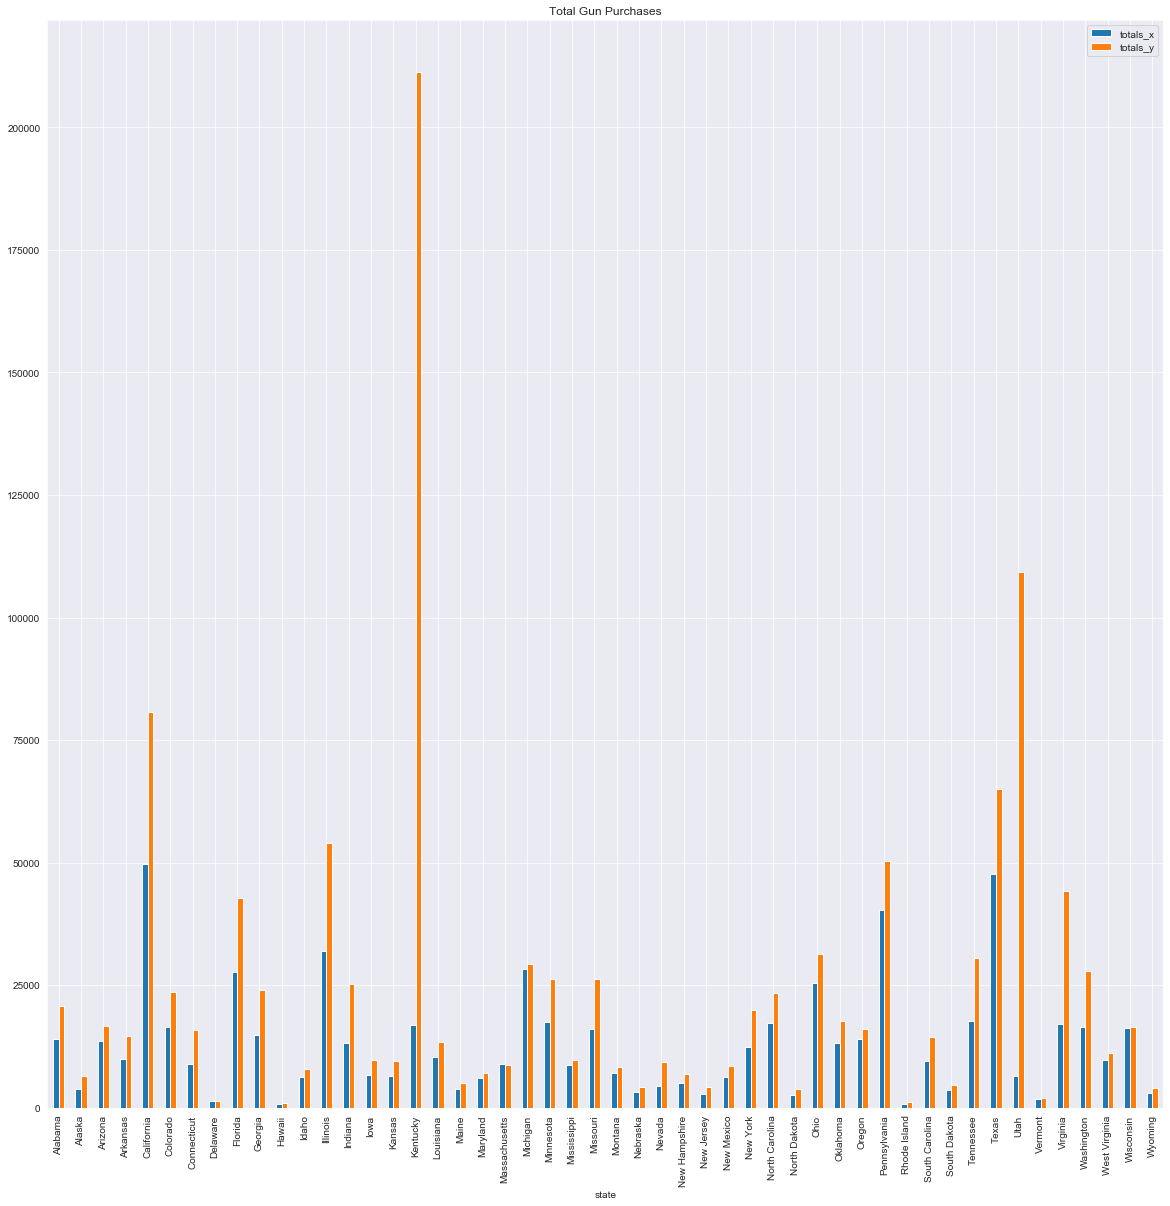

In [456]:
q1_combined.plot(x = 'state',title = 'Total Gun Purchases',
                 y = ['totals_x','totals_y'],kind = 'bar', figsize = (20,20));

In [457]:
kent_2005 = q1_combined[q1_combined['state'] == 'Kentucky']['totals_x']
kent_2010 = q1_combined[q1_combined['state'] == 'Kentucky']['totals_y']

print('The total number of firearms sold in state of Ketucky in 2000 is:',kent_2005);
print('The total number of firearms sold in state of Ketucky in 2010 is:',kent_2010);

The total number of firearms sold in state of Ketucky in 2000 is: 16    16961
Name: totals_x, dtype: int64
The total number of firearms sold in state of Ketucky in 2010 is: 16    211261
Name: totals_y, dtype: int64


#### Insight:
> After looking through the overall firearms sold in the year of 2005 and compared to the year of  2010, there has been a very significant increase in the 5-year span. There has been an increase of 194,300 firearms in 2010 compared to 2005

### Research Question 2: 

#### What is per capita firearm sales for all states in April 2010 vs July 2016?

In [458]:
# To perform analysis on the question above, we will require some data from both the dataframes 

df_q2 = df_gun[['state','month','totals']]


df_q2 = df_q2[df_q2['month'] == '2016-07-01']

df_q2

,state,month,totals
770,Alabama,2016-07-01,48927
771,Alaska,2016-07-01,6793
772,Arizona,2016-07-01,34496
773,Arkansas,2016-07-01,19378
774,California,2016-07-01,190218
775,Colorado,2016-07-01,43094
776,Connecticut,2016-07-01,29755
777,Delaware,2016-07-01,4494
779,Florida,2016-07-01,125208
780,Georgia,2016-07-01,49183


In [460]:
#Drop the indexes from the between and get new indexes
df_q2.reset_index(drop = True ,inplace = True)

df_q2

,state,month,totals
0,Alabama,2016-07-01,48927
1,Alaska,2016-07-01,6793
2,Arizona,2016-07-01,34496
3,Arkansas,2016-07-01,19378
4,California,2016-07-01,190218
5,Colorado,2016-07-01,43094
6,Connecticut,2016-07-01,29755
7,Delaware,2016-07-01,4494
8,Florida,2016-07-01,125208
9,Georgia,2016-07-01,49183


In [473]:
#We are adding the Population of July 2016 in the newly created df
df_q2['population_july2016'] = df_census['population estimates, july 1, 2016,  (v2016)'].values

df_q2.head()

,state,month,totals,population_july2016
0,Alabama,2016-07-01,48927,4863300
1,Alaska,2016-07-01,6793,741894
2,Arizona,2016-07-01,34496,6931071
3,Arkansas,2016-07-01,19378,2988248
4,California,2016-07-01,190218,39250017


In [466]:
#we are performing the same steps to create a new dataframe for April 2010
df_q2_2010 = df_gun[['state','month','totals']]

df_q2_2010 = df_q2_2010[df_q2_2010['month']=='2010-04-01']

df_q2_2010.reset_index(drop=True, inplace=True)

df_q2_2010

,state,month,totals
0,Alabama,2010-04-01,20791
1,Alaska,2010-04-01,6411
2,Arizona,2010-04-01,16578
3,Arkansas,2010-04-01,14563
4,California,2010-04-01,80750
5,Colorado,2010-04-01,23609
6,Connecticut,2010-04-01,15922
7,Delaware,2010-04-01,1439
8,Florida,2010-04-01,42794
9,Georgia,2010-04-01,24065


In [472]:
df_q2_2010['population_april2010'] = df_census['population estimates base, april 1, 2010,  (v2016)'].values

df_q2_2010.head()

,state,month,totals,population_april2010
0,Alabama,2010-04-01,20791,4780131
1,Alaska,2010-04-01,6411,710249
2,Arizona,2010-04-01,16578,6392301
3,Arkansas,2010-04-01,14563,2916025
4,California,2010-04-01,80750,37254522


In [477]:
#We will now try to calculate the per capita income percentage by summing all the states 
#and then try showing a graph of the changed from 2010 till 2016


df_q2['totals_2010'] = df_q2_2010['totals'].values
df_q2['population_april2010'] = df_q2_2010['population_april2010'].values
df_q2

,state,month,totals,population_july2016,totals_2010,population_april2010
0,Alabama,2016-07-01,48927,4863300,20791,4780131
1,Alaska,2016-07-01,6793,741894,6411,710249
2,Arizona,2016-07-01,34496,6931071,16578,6392301
3,Arkansas,2016-07-01,19378,2988248,14563,2916025
4,California,2016-07-01,190218,39250017,80750,37254522
5,Colorado,2016-07-01,43094,5540545,23609,5029324
6,Connecticut,2016-07-01,29755,3576452,15922,3574114
7,Delaware,2016-07-01,4494,952065,1439,897936
8,Florida,2016-07-01,125208,20612439,42794,18804592
9,Georgia,2016-07-01,49183,10310371,24065,9688680


In [501]:
#Now let us calculate the capita of 2010 and 2016 

capita_2010 = df_q2.totals_2010.sum()/ df_q2.population_april2010.sum()
print('The per capita firearms for April 2010 is:', capita_2010)

capita_2016 = df_q2.totals.sum()/ df_q2.population_july2016.sum()
print('The per capita firearms for July 2016 is:', capita_2016)

The per capita firearms for April 2010 is: 0.003978133320178106
The per capita firearms for July 2016 is: 0.006777933902633841


In [502]:
#To make it easier to perform calculations and analysis, we'll multiply both the variables by 100 
capita_2010 = capita_2010*100
capita_2016 = capita_2016*100

print('New capita_2010:',capita_2010)
print('New capita_2016:',capita_2016)

New capita_2010: 0.3978133320178106
New capita_2016: 0.677793390263384


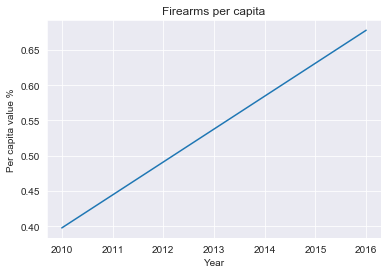

In [504]:
#now we plot the graph to note the changes

years = [2010,2016]
per_capita = [capita_2010,capita_2016]
plt.plot(years,per_capita);
plt.title('Firearms per capita');
plt.xlabel('Year');
plt.ylabel('Per capita value %');

#### Insights:
> The graph shows us the increase in per capita ownership of firearms. The per-capita value (percentage value) in April 2010 is 0.38 and it goes on to 0.678 in July 2016.


<a id='conclusions'></a>
## Conclusions


A few conclusions could be made using the questions asked to the database:

1. After comparing the gun data between the years 2005 and 2010, there has been a significant increase in firearm purchases. We compared the data between April 2005 and April 2010, coming to a conclusion that the state of Kentucky has the highest increase with a number of 194,300 firearms in the 5-year span.

2. The second graph helps us in understanding the increase in per capita ownership of firearms. The per-capita value (percentage value) in April 2010 is 0.38 and it goes on to 0.678 in July 2016.

#### Number of things to be considered for the question  2 visual:
> 1. This chart is a nation-wide chart and does give us a birds-eye view.
> 2. At state level this graph's slope will vary and hence the insights cannot be generalized.
> 3. Also, we are using 2 point of time (i.e. April 2010 and July 2016), whereas we have no   information about how this per capita relationship will vary over the 6 years between 2010 and 2016. Again, this insight cannot be generalized.

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0